In [1]:
%%capture

!mamba install -y nltk
!pip install torchtext -qqq

In [1]:
!pip show torchtext

Name: torchtext
Version: 0.15.2
Summary: Text utilities and datasets for PyTorch
Home-page: https://github.com/pytorch/text
Author: PyTorch core devs and James Bradbury
Author-email: jekbradbury@gmail.com
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, requests, torch, torchdata, tqdm
Required-by: 


In [2]:
%%capture
import warnings
from tqdm import tqdm

warnings.simplefilter('ignore')
import time
from collections import OrderedDict

import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import nltk
nltk.download('punkt')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import string
import time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
%capture

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')

True

# Defining helper functions
Remove all non-word characters (everything except numbers and letters)

In [4]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

# Language modeling

In [5]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

# Tokenization

In [6]:
from nltk.tokenize import word_tokenize
def preprocess(word):
    tokens = word_tokenize(word)
    tokens = [preprocess_string(w) for w in tokens]
    return [w.lower() for w in tokens if len(w)!=0 or not(w in string.punctuation)]

tokens = preprocess(song)

In [7]:
tokens[0:10]

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']

In [8]:
# Create a frequency distribution of words
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'na': 40, 'gon': 38, 'you': 37, 'never': 36, 'and': 16, 'tell': 9, 'make': 8, 'say': 8, 'a': 7, 'give': 6, ...})

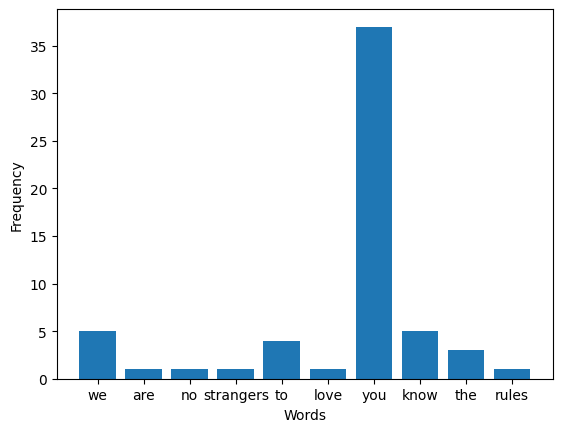

In [9]:
plt.bar(list(fdist.keys())[0:10],list(fdist.values())[0:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# Unigram model
An unigram model is a simple type of language model that considers each word in a sequence independently, without taking into account the previous words. In other words, it models the probability of each word occurring in the text, regardless of what came before it. Unigram models can be seen as a special case of n-gram models, where n is 1.

In [10]:
#total count of each word
C=sum(fdist.values())
C

385

In [11]:
fdist['strangers']/C

0.0025974025974025974

In [12]:
vocabulary = set(tokens)

# Bigram model

In [13]:
bigrams = nltk.bigrams(tokens)
bigrams

<generator object bigrams at 0x796434ec18c0>

In [14]:
my_bigrams = list(nltk.bigrams(tokens))
my_bigrams[0:10]

[('we', 'are'),
 ('are', 'no'),
 ('no', 'strangers'),
 ('strangers', 'to'),
 ('to', 'love'),
 ('love', 'you'),
 ('you', 'know'),
 ('know', 'the'),
 ('the', 'rules'),
 ('rules', 'and')]

In [15]:
freq_bigrams = nltk.FreqDist(nltk.bigrams(tokens))
freq_bigrams

FreqDist({('gon', 'na'): 38, ('never', 'gon'): 36, ('you', 'never'): 9, ('na', 'tell'): 8, ('make', 'you'): 8, ('na', 'give'): 6, ('give', 'you'): 6, ('you', 'up'): 6, ('up', 'never'): 6, ('na', 'let'): 6, ...})

In [16]:
freq_bigrams.most_common(10)

[(('gon', 'na'), 38),
 (('never', 'gon'), 36),
 (('you', 'never'), 9),
 (('na', 'tell'), 8),
 (('make', 'you'), 8),
 (('na', 'give'), 6),
 (('give', 'you'), 6),
 (('you', 'up'), 6),
 (('up', 'never'), 6),
 (('na', 'let'), 6)]

In [17]:
freq_bigrams[('we', 'are')]

1

In [18]:
for my_bigram in my_bigrams:
    print(my_bigram)
    print(freq_bigrams[my_bigram])

('we', 'are')
1
('are', 'no')
1
('no', 'strangers')
1
('strangers', 'to')
1
('to', 'love')
1
('love', 'you')
1
('you', 'know')
1
('know', 'the')
3
('the', 'rules')
1
('rules', 'and')
1
('and', 'so')
1
('so', 'do')
1
('do', 'i')
1
('i', 'a')
1
('a', 'full')
1
('full', 'commitments')
1
('commitments', 'what')
1
('what', 'im')
1
('im', 'thinking')
1
('thinking', 'of')
1
('of', 'you')
1
('you', 'wouldnt')
1
('wouldnt', 'get')
1
('get', 'this')
1
('this', 'from')
1
('from', 'any')
1
('any', 'other')
1
('other', 'guy')
1
('guy', 'i')
1
('i', 'just')
2
('just', 'wan')
2
('wan', 'na')
2
('na', 'tell')
8
('tell', 'you')
2
('you', 'how')
2
('how', 'im')
3
('im', 'feeling')
3
('feeling', 'got')
2
('got', 'ta')
2
('ta', 'make')
2
('make', 'you')
8
('you', 'understand')
2
('understand', 'never')
2
('never', 'gon')
36
('gon', 'na')
38
('na', 'give')
6
('give', 'you')
6
('you', 'up')
6
('up', 'never')
6
('never', 'gon')
36
('gon', 'na')
38
('na', 'let')
6
('let', 'you')
6
('you', 'down')
6
('down', '

In [19]:
word="strangers"
vocab_probabilities = {}

for next_word in vocabulary:
    vocab_probabilities[next_word] = freq_bigrams[(word, next_word)] / fdist[word]

vocab_probabilities = sorted(vocab_probabilities.items(), key=lambda x:x[1], reverse=True)


In [20]:
vocab_probabilities[0:10]

[('to', 1.0),
 ('see', 0.0),
 ('gon', 0.0),
 ('im', 0.0),
 ('a', 0.0),
 ('and', 0.0),
 ('strangers', 0.0),
 ('got', 0.0),
 ('blind', 0.0),
 ('it', 0.0)]

In [21]:
def make_predictions(my_words, freq_grams, normlize=1, vocabulary=vocabulary):
    """
    Generate predictions for the conditional probability of the next word given a sequence.

    Args:
        my_words (list): A list of words in the input sequence.
        freq_grams (dict): A dictionary containing frequency of n-grams.
        normlize (int): A normalization factor for calculating probabilities.
        vocabulary (list): A list of words in the vocabulary.

    Returns:
        list: A list of predicted words along with their probabilities, sorted in descending order.
    """

    vocab_probabilities = {}  # Initialize a dictionary to store predicted word probabilities

    context_size = len(list(freq_grams.keys())[0])  # Determine the context size from n-grams keys

    # Preprocess input words and take only the relevant context words
    my_tokens = preprocess(my_words)[0:context_size - 1]

    # Calculate probabilities for each word in the vocabulary given the context
    for next_word in vocabulary:
        temp = my_tokens.copy()
        temp.append(next_word)  # Add the next word to the context

        # Calculate the conditional probability using the frequency information
        if normlize!=0:
            vocab_probabilities[next_word] = freq_grams[tuple(temp)] / normlize
        else:
            vocab_probabilities[next_word] = freq_grams[tuple(temp)]
    # Sort the predicted words based on their probabilities in descending order
    vocab_probabilities = sorted(vocab_probabilities.items(), key=lambda x: x[1], reverse=True)

    return vocab_probabilities  # Return the sorted list of predicted words and their probabilities

In [22]:
my_words="are"

vocab_probabilities=make_predictions(my_words,freq_bigrams,normlize=fdist['i'])

In [23]:
vocab_probabilities[0:10]

[('no', 0.3333333333333333),
 ('see', 0.0),
 ('gon', 0.0),
 ('im', 0.0),
 ('a', 0.0),
 ('and', 0.0),
 ('strangers', 0.0),
 ('got', 0.0),
 ('blind', 0.0),
 ('it', 0.0)]

In [24]:
vocab_probabilities[0][0]

'no'

In [25]:
my_song = ''

for w in tokens[0:100]:
    my_word = make_predictions(w, freq_bigrams)[0][0]
    my_song += ' '+my_word

In [26]:
my_song

' both no strangers to say you never the game and desert long i just lie commitments what im feeling of you never get this from any other for i just wan na tell a never im feeling got ta make you never never gon na tell you never never gon na tell you never never gon na tell around and desert you never gon na tell you never never gon na tell goodbye never gon na tell a lie and desert you never known each other for so long your hearts been aching but youre too shy to say goodbye'

In [27]:
my_song="i"

for i in range(100):
    my_word=make_predictions(my_word,freq_bigrams)[0][0]
    my_song+=" "+my_word

In [28]:
my_song

'i never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never gon na tell a lie and desert you never'

# Trigram model

In [29]:
freq_trigrams = nltk.FreqDist(nltk.trigrams(tokens))
freq_trigrams

FreqDist({('never', 'gon', 'na'): 36, ('you', 'never', 'gon'): 9, ('gon', 'na', 'give'): 6, ('na', 'give', 'you'): 6, ('give', 'you', 'up'): 6, ('you', 'up', 'never'): 6, ('up', 'never', 'gon'): 6, ('gon', 'na', 'let'): 6, ('na', 'let', 'you'): 6, ('let', 'you', 'down'): 6, ...})

In [30]:
make_predictions('so do', freq_trigrams, normlize=freq_bigrams[('do', 'i')])[0:10]

[('i', 1.0),
 ('see', 0.0),
 ('gon', 0.0),
 ('im', 0.0),
 ('a', 0.0),
 ('and', 0.0),
 ('strangers', 0.0),
 ('got', 0.0),
 ('blind', 0.0),
 ('it', 0.0)]

In [31]:
my_song = ''

w1 = tokens[0]
for w2 in tokens[0:100]:
    gram = w1+' '+w2
    my_word = make_predictions(gram, freq_trigrams,)[0][0]
    my_song+=" "+my_word
    w1 = w2


In [32]:
my_song

' see no strangers to love you know the game and so do i a full commitments what im thinking of you wouldnt get this from any other guy i just wan na tell a how im feeling got ta make you cry never gon na let you up never gon na let you down never gon na let around and desert you never gon na let you cry never gon na let goodbye never gon na let a lie and hurt you never known each other for so long your hearts been aching but youre too shy to say it'

# Feedforward Neural Networks (FNNs) for language models
FNNs, or Multi-Layer Perceptrons, serve as the foundational components for comprehending neural networks in natural language processing (NLP). In NLP tasks, FNNs process textual data by transforming it into numerical vectors known as embeddings. Subsequently, these embeddings are input to the network to predict language facets, such as the upcoming word in a sentence or the sentiment of a text.

In [34]:
# !pip install torchtext==0.15.2

In [33]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Tokenization for

In [35]:
tokenizer = get_tokenizer('basic_english')
tokens = tokenizer(song)

# Indexing

In [38]:
# Create a vocabulary from text tokens

# tokenize the 'song' text using the provided tokenizer.
# The map function applies the tokenizer to each word in the 'song' after splitting it.
# The result is a list of tokens representing the words in the 'song'.
tokenized_song = map(tokenizer, song.split())

# Step 2: Vocabulary Building
# The build_vocab_from_iterator function constructs a vocabulary from the tokenized text.
# In this case, add a special token "<unk>" (unknown token) to handle out-of-vocabulary words.
vocab = build_vocab_from_iterator(tokenized_song, specials=["<unk>"])

# Step 3: Set Default Index
# Set the default index for the vocabulary to the index corresponding to the "<unk>" token.
# This ensures that any unknown tokens in the future will be mapped to this index.
vocab.set_default_index(vocab["<unk>"])

In [40]:
vocab(tokens[0:10])

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

In [41]:
text_pipeline = lambda x: vocab(tokenizer(x))
text_pipeline(song)[0:10]

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

In [42]:
index_to_token = vocab.get_itos()
index_to_token[0]

'<unk>'

# Embedding Layer

In [43]:
embedding_dim = 20
vocab_size = len(vocab)
embeddings = nn.Embedding(vocab_size, embedding_dim)

In [44]:
for n in range(2):
    embedding=embeddings(torch.tensor(n))
    print("word",index_to_token[n])
    print("index",n)
    print( "embedding", embedding)
    print("embedding shape", embedding.shape)

word <unk>
index 0
embedding tensor([-0.8823, -0.7623, -0.8087, -1.6604,  0.7472, -0.2591,  0.1719, -0.7926,
         0.8788,  0.9870, -1.5642,  0.6871,  1.5857,  0.8467,  2.3796, -2.4463,
        -1.0876, -1.6581,  1.5114, -0.7955], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
word gonna
index 1
embedding tensor([-1.4532, -0.6617,  3.2396, -0.2722, -0.5758, -1.8697,  0.1937, -0.3287,
        -0.6228, -0.2433, -0.5996,  0.5787, -0.1073,  0.9955, -1.1046, -1.4278,
        -1.0910, -0.4456,  0.5838, -1.5031], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])


# Generating context-target pairs (n-grams)

In [45]:
CONTEXT_SIZE=2

ngrams = [
    (
        [tokens[i - j - 1] for j in range(CONTEXT_SIZE)],
        tokens[i]
    )
    for i in range(CONTEXT_SIZE, len(tokens))
]

In [46]:
context, target=ngrams[0]
print("context",context,"target",target)
print("context index",vocab(context),"target index",vocab([target]))

context ['are', 'we'] target no
context index [58, 21] target index [70]


In [48]:
linear  = nn.Linear(embedding_dim*CONTEXT_SIZE, 128)

In [51]:
my_embedding = embeddings(torch.tensor(vocab(context)))
my_embedding.shape

torch.Size([2, 20])

In [52]:
my_embedding = my_embedding.reshape(1, -1)
my_embedding.shape

torch.Size([1, 40])

In [54]:
linear(my_embedding)

tensor([[-0.5753, -0.1598, -0.6171, -0.7967,  0.6423,  0.1036,  0.1479, -0.6548,
         -0.0466, -0.7717,  0.4084, -0.0704, -0.3172, -0.7104, -0.7682,  0.2840,
          0.3187, -0.7823,  0.8846, -0.5331,  0.2985,  0.5549, -0.1536, -0.7122,
          0.0970, -0.1571, -0.2904,  0.2412,  1.3688,  0.9660, -0.4142,  0.5701,
         -0.1520, -0.4990, -0.8689, -0.0676, -1.0483, -0.1429,  0.5927,  0.0774,
          0.1942,  0.0295,  0.0421,  0.3388,  0.4046, -0.3902, -0.4703,  0.0894,
         -0.2711,  0.0869, -0.2924, -0.7289, -0.0356,  0.9586,  0.0421,  0.0524,
         -0.3846,  0.0776, -0.2962,  0.7323,  1.1624, -0.4919, -0.0102, -0.1345,
         -0.0389, -0.3673, -0.7336, -0.1972,  0.0475, -0.0548,  0.1819,  0.5389,
          0.4527,  0.4640,  0.8992,  0.0057,  0.0032,  0.0565,  0.6323,  0.6255,
         -0.3713,  0.8885, -0.1421, -0.1586, -0.0517, -0.3207,  0.6719,  0.0251,
          0.4746,  0.5103, -1.1117, -0.3935, -0.5848, -0.8472, -0.2466, -0.7978,
         -0.1942,  0.1132,  

# Batch function

In [55]:
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CONTEXT_SIZE=3
BATCH_SIZE=10
EMBEDDING_DIM = 10

def collate_batch(batch):
    batch_size=len(batch)
    context, target=[],[]
    for i in range(CONTEXT_SIZE,batch_size):
        target.append(vocab([batch[i]]))
        context.append(vocab([batch[i-j-1] for j in range(CONTEXT_SIZE)]))

    return   torch.tensor(context).to(device),  torch.tensor(target).to(device).reshape(-1)

Similarly, it's important to highlight that the size of the last batch could deviate from that of the earlier batches. To tackle this, the approach involves adjusting the final batch to conform to the specified batch size, ensuring it becomes a multiple of the predetermined size. When necessary, you'll employ padding techniques to achieve this harmonization. One approach you'll use is appending the beginning of the song to the end of the batch.

In [56]:
Padding=BATCH_SIZE-len(tokens)%BATCH_SIZE
tokens_pad=tokens+tokens[0:Padding]

In [57]:
dataloader = DataLoader(batch_size=BATCH_SIZE, dataset=tokens_pad, shuffle=True, collate_fn=collate_batch)

# Multi-class neural network
You have developed a PyTorch class for a multi-class neural network. The network's output is the probability of the next word within a given context. Therefore, the number of classes corresponds to the count of distinct words. The initial layer consists of embeddings, and in addition to the final layer, an extra hidden layer is incorporated.

In [58]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.context_size=context_size
        self.embedding_dim=embedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        embeds=torch.reshape( embeds, (-1,self.context_size * self.embedding_dim))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)

        return out

In [59]:
model = NGramLanguageModeler(len(vocab), embedding_dim, CONTEXT_SIZE).to(device)

In [60]:
context, target=next(iter(dataloader))
out=model(context)

In [61]:
out.shape

torch.Size([7, 79])

In [62]:
predicted_index =torch.argmax(out,1)
predicted_index

tensor([ 2, 22, 64, 31, 42, 42, 12])

In [63]:
[index_to_token[i.item()] for i in  predicted_index]

['you', 'been', 'from', 'the', 'hearts', 'hearts', 'down']

In [64]:
def write_song(model,number_of_words=100):
    my_song=""
    for i in range(number_of_words):
        with torch.no_grad():
            context=torch.tensor(vocab([tokens[i-j-1] for j in range(CONTEXT_SIZE)])).to(device)
            word_inx=torch.argmax(model(context))
            my_song+=" "+index_to_token[word_inx.detach().item()]

    return my_song

In [65]:
write_song(model)

' been from your from inside the wouldnt what down hearts the the wouldnt ask were each are wouldnt from of from lie but shy hearts it give been wanna wouldnt from the are inside the play <unk> from do inside wanna give just of you the play it from you the down hearts whats whats the you down from down wanna you the hearts hearts shy the the it from you love strangers inside inside been from hearts lie give too wouldnt feeling wouldnt what lie hearts down the wouldnt from down the hearts from give been around the the'

In [66]:
criterion = torch.nn.CrossEntropyLoss()

In [67]:
def train(dataloader, model, number_of_epochs=100, show=10):
    """
    Args:
        dataloader (DataLoader): DataLoader containing training data.
        model (nn.Module): Neural network model to be trained.
        number_of_epochs (int, optional): Number of epochs for training. Default is 100.
        show (int, optional): Interval for displaying progress. Default is 10.

    Returns:
        list: List containing loss values for each epoch.
    """

    MY_LOSS = []  # List to store loss values for each epoch

    # Iterate over the specified number of epochs
    for epoch in tqdm(range(number_of_epochs)):
        total_loss = 0  # Initialize total loss for the current epoch
        my_song = ""    # Initialize a string to store the generated song

        # Iterate over batches in the dataloader
        for context, target in dataloader:
            model.zero_grad()          # Zero the gradients to avoid accumulation
            predicted = model(context)  # Forward pass through the model to get predictions
            loss = criterion(predicted, target.reshape(-1))  # Calculate the loss
            total_loss += loss.item()   # Accumulate the loss

            loss.backward()    # Backpropagation to compute gradients
            optimizer.step()   # Update model parameters using the optimizer

        # Display progress and generate song at specified intervals
        if epoch % show == 0:
            my_song += write_song(model)  # Generate song using the model

            print("Generated Song:")
            print("\n")
            print(my_song)

        MY_LOSS.append(total_loss/len(dataloader))  # Append the total loss for the epoch to MY_LOSS list

    return MY_LOSS  # Return the list of  mean loss values for each epoch

In [68]:
my_loss_list=[]

In [69]:
# Define the context size for the n-gram model
CONTEXT_SIZE = 2

# Create an instance of the NGramLanguageModeler class with specified parameters
model_2 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define the optimizer for training the model, using stochastic gradient descent (SGD)
optimizer = optim.SGD(model_2.parameters(), lr=0.01)

# Set up a learning rate scheduler using StepLR to adjust the learning rate during training
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

In [70]:
my_loss=train(dataloader,model_2)

  4%|▍         | 4/100 [00:00<00:05, 16.05it/s]

Generated Song:


 you never you never you you never goodbye you were goodbye goodbye know you know i this you you love you you you any goodbye we from know goodbye never full i you im goodbye you never never you goodbye know never you gonna goodbye know never you gonna never never never you gonna were never goodbye never know never gonna i know never goodbye gonna i never you gonna you goodbye i any me you any you just you never never you never you you never goodbye never goodbye i i i never never gonna you you you you


 15%|█▌        | 15/100 [00:00<00:03, 23.43it/s]

Generated Song:


 you never never never gonna you never gonna you gonna gonna never never you gonna never gonna never never never gonna you you never gonna never never gonna gonna never gonna never you gonna you never never never never gonna gonna never you gonna gonna never never you gonna never never never never gonna gonna never never you never never gonna gonna gonna never never gonna gonna never you gonna gonna you gonna never gonna you never you gonna you never never you never never you never never never gonna never never never never never gonna never you you you


 26%|██▌       | 26/100 [00:01<00:02, 30.90it/s]

Generated Song:


 you never you never gonna you never gonna you gonna gonna gonna never you gonna gonna gonna you you gonna gonna gonna you never gonna you gonna gonna gonna never gonna gonna you gonna you you gonna gonna never gonna you gonna you gonna you you never you gonna never never never gonna gonna never you gonna you you never gonna gonna you never gonna gonna gonna never you gonna never gonna gonna gonna gonna you never you gonna you never never you never you you never never gonna gonna you never gonna never never gonna never you you you


 38%|███▊      | 38/100 [00:01<00:01, 33.15it/s]

Generated Song:


 you gonna you gonna gonna you you you gonna gonna gonna you never gonna gonna gonna gonna you you gonna gonna gonna you gonna gonna you gonna gonna gonna you gonna gonna you gonna you you gonna gonna you you you gonna you gonna you you you you gonna you you gonna gonna gonna you you you you you gonna gonna you you gonna you gonna gonna you you gonna you you gonna gonna gonna you gonna you gonna you never never you gonna you you gonna never gonna gonna you gonna gonna gonna you gonna you gonna you you


 47%|████▋     | 47/100 [00:01<00:01, 34.91it/s]

Generated Song:


 you gonna you gonna gonna you gonna gonna gonna gonna gonna never never gonna gonna gonna gonna you you gonna gonna gonna you gonna gonna gonna gonna gonna gonna never gonna gonna you gonna you you gonna gonna gonna gonna never gonna gonna gonna you never you you gonna gonna never gonna gonna gonna gonna you gonna you gonna gonna gonna gonna never gonna gonna gonna gonna you gonna gonna gonna gonna gonna never gonna you gonna you gonna you never never you gonna never you gonna never gonna gonna never gonna gonna gonna gonna gonna you gonna you you


 56%|█████▌    | 56/100 [00:01<00:01, 36.79it/s]

Generated Song:


 you never you you gonna never never you gonna never gonna never never you gonna never you you you gonna gonna gonna you never never gonna gonna never gonna never you never you gonna you you gonna never you you never gonna you never never never you you never never never never gonna never never never never you you gonna never never never never gonna never never never gonna never never you never never gonna you gonna you never you never never you never never you gonna never gonna gonna never never gonna gonna you gonna never gonna you you


 68%|██████▊   | 68/100 [00:02<00:00, 36.61it/s]

Generated Song:


 you gonna never never gonna gonna gonna gonna gonna never gonna never never gonna gonna gonna gonna never you gonna gonna gonna you gonna gonna gonna gonna gonna gonna never gonna gonna you never you gonna gonna never gonna never never gonna never never never gonna gonna you never never never gonna gonna never never gonna gonna you gonna gonna never gonna never gonna gonna never never gonna gonna never never never gonna gonna gonna you gonna gonna gonna gonna never never gonna gonna never gonna gonna never gonna gonna never gonna gonna gonna never gonna never gonna you gonna


 76%|███████▌  | 76/100 [00:02<00:00, 35.23it/s]

Generated Song:


 you never you you you you you you gonna gonna gonna never never gonna gonna you gonna you you gonna you gonna you you gonna you gonna gonna gonna you gonna gonna you gonna you you gonna gonna you gonna you gonna gonna gonna you gonna you you gonna gonna never gonna gonna gonna you you you you you gonna gonna gonna you gonna gonna gonna you you gonna gonna you you gonna never gonna you gonna gonna you you never you you gonna never you gonna never gonna gonna gonna gonna gonna gonna you gonna you gonna you you


 89%|████████▉ | 89/100 [00:02<00:00, 36.76it/s]

Generated Song:


 you never you you gonna you never you gonna never gonna never never you gonna you gonna you you gonna you gonna you you gonna you gonna gonna gonna never you never you gonna never you you you you gonna you gonna you never you never you you never you never you you never you never you you never you never you you never you never you never you never you you gonna never you you you gonna you you never never you gonna never you gonna never gonna gonna never you gonna gonna never gonna you gonna you you


 97%|█████████▋| 97/100 [00:03<00:00, 34.03it/s]

Generated Song:


 never never you never gonna you never gonna gonna never gonna never never gonna gonna never gonna never you gonna you gonna you never gonna you gonna gonna gonna never gonna never you never never you gonna never you you never gonna you gonna you never never you gonna never never never gonna gonna never never you you gonna you gonna gonna never never you gonna never you you gonna never you gonna never gonna never never gonna gonna you never never you never never you never never gonna gonna never never gonna gonna you gonna you gonna you you


100%|██████████| 100/100 [00:03<00:00, 31.27it/s]


In [71]:
save_path = '2gram.pth'
torch.save(model_2.state_dict(), save_path)
my_loss_list.append(my_loss)

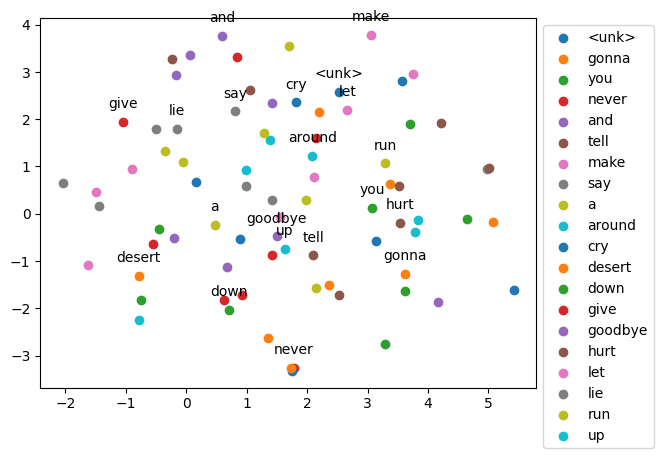

In [72]:
X = model_2.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [73]:
CONTEXT_SIZE=4
model_4 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_4.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss=train(dataloader,model_4 )

save_path = '4gram.pth'
torch.save(model_4.state_dict(), save_path)

my_loss_list.append(my_loss)

  8%|▊         | 8/100 [00:00<00:02, 34.85it/s]

Generated Song:


 never too gonna run gonna too <unk> any and gonna never but never never run and never never gonna gonna full never never aching from gonna guy me never and goodbye and never and ask too inside full gonna you never run im gonna gonna and inside im gonna too wouldnt it never gonna you and of are you and gonna gonna guy and never gonna you never and gonna too and never of guy never gonna strangers and me gonna never guy never and never gonna never but say guy say say never me say guy and so and


 16%|█▌        | 16/100 [00:00<00:02, 34.52it/s]

Generated Song:


 you gonna you you gonna gonna gonna never you gonna never you never you never you never never you gonna never never never you gonna gonna never you never gonna gonna you never never you gonna you gonna gonna you never you you gonna gonna you gonna you gonna you gonna you never gonna you gonna gonna never you gonna gonna gonna you gonna never gonna you you you gonna gonna you never gonna never you gonna you never you gonna gonna you never gonna you gonna never you gonna never gonna never you you gonna never you never never


 29%|██▉       | 29/100 [00:00<00:01, 37.16it/s]

Generated Song:


 you gonna you never gonna gonna never never you gonna never you never you never you never never gonna gonna never never never gonna gonna gonna gonna you never gonna gonna gonna never never gonna gonna you never gonna gonna never gonna you gonna gonna never gonna you gonna gonna gonna never never gonna you never gonna never you gonna gonna gonna never gonna never gonna gonna never you gonna gonna gonna gonna gonna never you gonna never never you gonna gonna you never never you gonna never gonna gonna never gonna never you never gonna never never never never


 37%|███▋      | 37/100 [00:01<00:01, 35.63it/s]

Generated Song:


 you gonna you never gonna gonna never never you never never you never you never you never never gonna gonna never never never you never gonna never you never gonna gonna you never you you gonna you never gonna gonna never never you gonna gonna never you you gonna gonna never you never gonna you never never never you you gonna gonna never never never gonna gonna never you gonna gonna never never gonna you you gonna never never you never gonna you never never you gonna you gonna gonna never gonna never you never gonna never you you never


 45%|████▌     | 45/100 [00:01<00:01, 34.87it/s]

Generated Song:


 never gonna gonna never gonna gonna gonna never you gonna never you never gonna gonna you never never gonna gonna never never never you gonna gonna gonna you never gonna gonna gonna never never gonna gonna gonna gonna gonna gonna never gonna gonna gonna gonna never gonna gonna gonna gonna gonna you never gonna gonna never gonna never you gonna gonna gonna never gonna gonna gonna gonna never you gonna gonna never gonna gonna you never gonna never gonna you never gonna gonna gonna gonna you gonna never gonna gonna never gonna gonna you never gonna never you gonna never


 57%|█████▋    | 57/100 [00:01<00:01, 36.66it/s]

Generated Song:


 never gonna gonna never gonna gonna you never never never never you never never gonna you never never gonna gonna never never never never gonna gonna gonna you never gonna gonna gonna never you never gonna gonna gonna gonna gonna never gonna gonna gonna gonna never gonna never gonna gonna gonna you never gonna never never gonna never never gonna gonna gonna never never gonna gonna gonna never never gonna gonna never never gonna never never gonna never gonna you never gonna gonna never never never gonna never gonna gonna never gonna gonna never never gonna never never you gonna


 65%|██████▌   | 65/100 [00:01<00:00, 37.23it/s]

Generated Song:


 you gonna you you you you you gonna you you you you never you gonna you never never gonna gonna you you never never never you you you you gonna you you you you you gonna you gonna gonna you gonna you you you gonna never you you gonna gonna gonna you you gonna never never gonna you you you you gonna gonna gonna you gonna you never you you gonna never never gonna you you gonna never gonna you never gonna you gonna you you you you gonna gonna you you you you you gonna you you you you


 77%|███████▋  | 77/100 [00:02<00:00, 36.93it/s]

Generated Song:


 never gonna you you you you you you you gonna you you never never gonna you never never gonna gonna you you never never gonna gonna you you you never you you you you you never you you you you never you you you never never you you gonna you never you you gonna never never gonna never you you gonna you never never you you you never you gonna you never never gonna never never gonna never you you gonna never you never you you you you gonna gonna gonna you you you you you you you you you


 85%|████████▌ | 85/100 [00:02<00:00, 35.44it/s]

Generated Song:


 gonna gonna you you you you you gonna you gonna you gonna never you gonna you gonna never gonna gonna you you never never gonna gonna you you you gonna you gonna you you you never you you gonna you never you you you gonna gonna gonna you gonna gonna gonna you gonna never gonna never gonna never you you gonna you never gonna you you gonna you you gonna you never gonna gonna never gonna gonna you you you gonna never you gonna never you gonna you gonna gonna you gonna you never you gonna never you you never


 98%|█████████▊| 98/100 [00:02<00:00, 37.34it/s]

Generated Song:


 you you you you you you you gonna you you you you never you gonna you never never you never you you never never gonna you you you never gonna you you you you you you you gonna gonna you never you gonna you you you gonna gonna gonna you gonna you never never you never gonna you you you you you you gonna you never you you you gonna you never gonna gonna never you you you gonna never never you you gonna never you gonna never gonna gonna gonna you you you you you you you you gonna


100%|██████████| 100/100 [00:02<00:00, 35.84it/s]


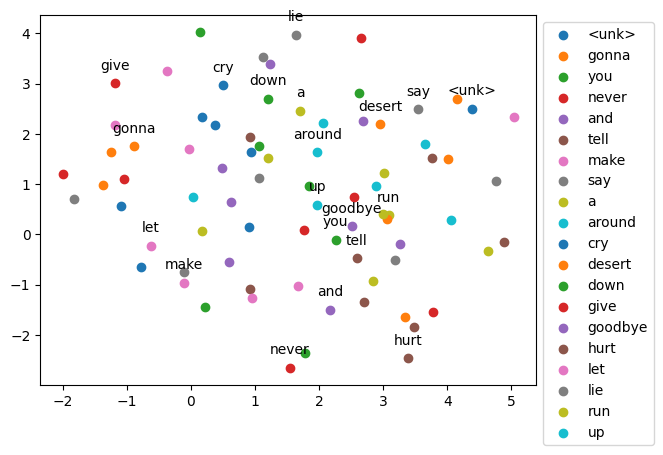

In [74]:
X = model_4.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [75]:
CONTEXT_SIZE=8
model_8 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_8.parameters(), lr=0.01)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss=train(dataloader,model_8)

save_path = '8gram.pth'
torch.save(model_8.state_dict(), save_path)

my_loss_list.append(my_loss)

  9%|▉         | 9/100 [00:00<00:02, 38.34it/s]

Generated Song:


 and and and hurt gonna hurt full aching and let desert commitments your we let weve and are gonna and shy full let and hearts shy you on hearts let let hearts full are let lie and hearts full hurt gonna aching you hurt full strangers give hearts your and strangers hearts hearts your gonna strangers gonna let you you strangers and strangers we whats your and strangers and lie gonna gonna gonna and and and and and of let and let hurt whats you hurt lie and known full hurt and and and and and your let any gonna


 17%|█▋        | 17/100 [00:00<00:02, 37.41it/s]

Generated Song:


 never never you gonna gonna never never gonna gonna you gonna you gonna never never you never never gonna you gonna never never gonna gonna you you you never never never you never you gonna never never gonna never never never never you you never gonna never never gonna gonna gonna never never never gonna gonna never never you you gonna you gonna never never gonna gonna gonna never never gonna gonna gonna gonna gonna never gonna never gonna gonna never never you gonna you never never gonna gonna never never never never gonna never never gonna gonna gonna gonna


 25%|██▌       | 25/100 [00:00<00:02, 34.52it/s]

Generated Song:


 never you gonna you never never never never gonna you gonna you gonna never never you you never gonna never gonna never never gonna you you you gonna never gonna never you never you gonna never never you never never never you you you never gonna never never never gonna gonna never never gonna gonna you never never you you never never gonna never never gonna never you never gonna gonna gonna you never you never you never you you never never you never you you never gonna gonna gonna never you you gonna never never gonna you gonna never


 38%|███▊      | 38/100 [00:01<00:01, 37.32it/s]

Generated Song:


 gonna never gonna you gonna never never never gonna gonna gonna you gonna never never you gonna never gonna you gonna gonna never gonna gonna you you gonna never gonna never you you gonna gonna gonna never you gonna gonna gonna gonna gonna you gonna gonna never gonna gonna gonna gonna never gonna gonna gonna you gonna gonna you gonna never you gonna never never gonna gonna gonna never gonna gonna gonna never gonna you gonna never gonna you you gonna gonna you gonna you gonna gonna gonna gonna gonna never gonna never gonna never gonna gonna gonna gonna never


 47%|████▋     | 47/100 [00:01<00:01, 38.65it/s]

Generated Song:


 you you you you you you you never gonna you you you gonna gonna never you you never you you gonna you never never you you you you never you you you you you gonna you you you gonna gonna you you you you you gonna never gonna you you you never gonna you you you you you you you you you you you never you you you never gonna you you you never you you never you you you gonna you you you you you you you gonna gonna never you you you you you you you gonna you


 56%|█████▌    | 56/100 [00:01<00:01, 38.15it/s]

Generated Song:


 gonna never gonna you gonna you gonna never gonna you gonna you gonna gonna never you gonna gonna gonna you gonna never never gonna gonna you you you never gonna never you you gonna gonna gonna you gonna gonna gonna gonna gonna you you you gonna never gonna gonna gonna you never gonna gonna gonna you gonna gonna you you you you you you gonna gonna gonna you you gonna gonna you you gonna you gonna never you you you gonna gonna you gonna you you never you gonna gonna gonna you you gonna you you gonna you gonna you


 68%|██████▊   | 68/100 [00:01<00:00, 36.60it/s]

Generated Song:


 gonna you gonna you you you gonna you gonna you gonna you gonna gonna you you gonna never gonna gonna gonna never gonna gonna gonna you you gonna gonna you never you you gonna gonna gonna gonna gonna gonna gonna gonna gonna you you gonna gonna never gonna gonna you you gonna gonna gonna gonna you gonna gonna you you never you you gonna gonna gonna you you you gonna gonna you you gonna you gonna you gonna you you gonna gonna you gonna you gonna you you gonna gonna gonna never gonna gonna you gonna gonna you never you


 76%|███████▌  | 76/100 [00:02<00:00, 35.76it/s]

Generated Song:


 you you you you never you never never never you you you you never never you gonna never never you you you you never you you you you never you never you you you gonna you you you gonna you you gonna you you you you never never never you you you never gonna you you never never you you never you you you never gonna you you you gonna never you you never you you you never you you gonna gonna you you you you never you you gonna never you gonna you you you you you never you


 84%|████████▍ | 84/100 [00:02<00:00, 34.92it/s]

Generated Song:


 you you you you gonna you you you never you you you you you you you you gonna you you you you you never you you you you you you you you you you gonna you you you gonna you you gonna you you you you you you you you you you you you you you you gonna you you you you you gonna you gonna you you you gonna you you you gonna you you you you you you gonna you you you you you you you you you you you gonna you you gonna you you gonna you


 96%|█████████▌| 96/100 [00:02<00:00, 35.54it/s]

Generated Song:


 you you you you gonna never you never never you you you you never never you you never gonna you you you never never gonna you you never never never you you you you you you you you gonna you you gonna you you you you you you you you you you you gonna you gonna you never you you you you you you you gonna you you you gonna you never you you you you you you you you you you you you you you never you you gonna you never gonna you never gonna you you gonna you


100%|██████████| 100/100 [00:02<00:00, 36.19it/s]


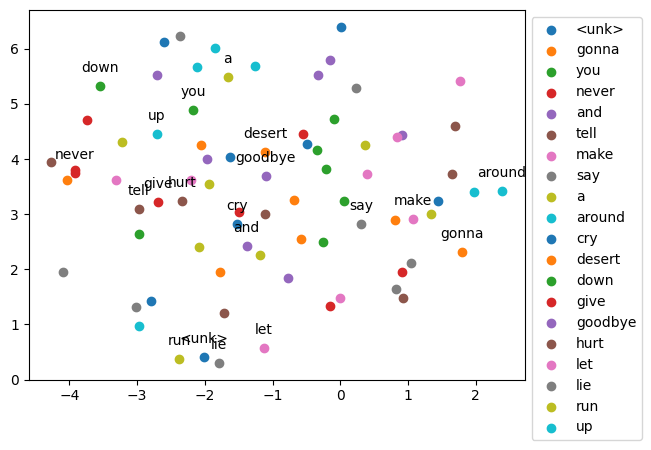

In [76]:
X = model_8.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

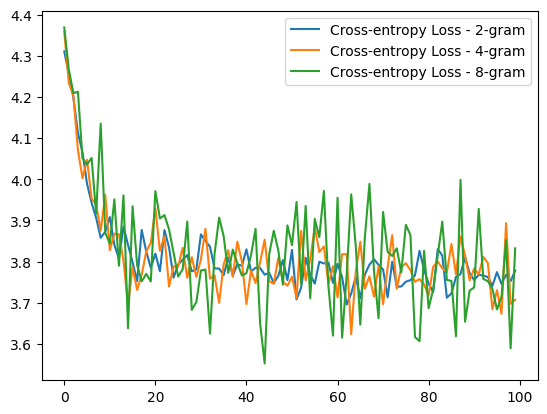

In [77]:
for (my_loss, model_name)in zip(my_loss_list,["2-gram","4-gram","8-gram"]):
    plt.plot(my_loss,label="Cross-entropy Loss - {}".format(model_name))
    plt.legend()